In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [25]:
class SVM:
    def __init__(self,lr=0.01,epochs=1000,regularization_parameter=0.01) -> None:
        self.lr = lr
        self.epochs = epochs
        self.regularization_parameter = regularization_parameter
        self.hinge_loss = []

    def fit(self,X,y):
        self.r, self.c = X.shape
        self.w = np.zeros(self.c)
        self.b = 0
        for _ in range(self.epochs):
            loss = self.update(X, y)
            if(_%100 == 0):
                print(f"For Iteration {_}: Loss is {loss}")

    def update(self,X,y):
        y_label = np.where(y <= 0,-1,1)
        for index, x_i in enumerate(X):
                dw = 2 * self.regularization_parameter * self.w if(y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1) else 2 * self.regularization_parameter * self.w - np.dot(x_i, y_label[index]) * self.w - np.dot(x_i, y_label[index])
                db = 0 if(y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1) else y_label[index]
                self.w -= self.lr * dw
                self.b -= self.lr * db
        loss = (1/len(y)) * np.sum((np.dot(X,self.w)-self.b) - y_label) ** 2
        self.hinge_loss.append(loss)
        return loss


    def get_hyperplane_value(self,x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    
    def visualize_svm(self,X,y):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = self.get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = self.get_hyperplane_value(x0_2, self.w, self.b, 0)

        x1_1_m = self.get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2_m = self.get_hyperplane_value(x0_2, self.w, self.b, -1)

        x1_1_p = self.get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2_p = self.get_hyperplane_value(x0_2, self.w, self.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.show()

    def predict(self,X):
        return np.where(np.sign(np.dot(X,self.w)-self.b) <= -1 , 0,1)


In [3]:
heart_disease_dataset = pd.read_csv('heart_disease.csv')


In [4]:
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
heart_disease_dataset.shape

(297, 14)

In [6]:
X = heart_disease_dataset.drop(columns="condition",axis=1)
y = heart_disease_dataset["condition"]

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
clf = SVM()
clf.fit(X,y)

For Iteration 0: Loss is 6.035944781144794
For Iteration 100: Loss is 1.1623447811447845
For Iteration 200: Loss is 0.3148447811447831
For Iteration 300: Loss is 0.5379447811447836
For Iteration 400: Loss is 0.8204447811447826
For Iteration 500: Loss is 1.1623447811447862
For Iteration 600: Loss is 0.8204447811447826
For Iteration 700: Loss is 0.5379447811447836
For Iteration 800: Loss is 0.820444781144781
For Iteration 900: Loss is 1.5636447811447827


## 2D Visualization

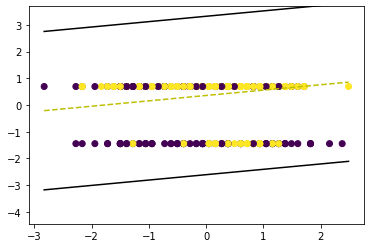

In [10]:
clf.visualize_svm(X,y)

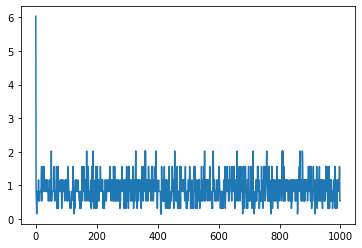

In [11]:
plt.plot(clf.hinge_loss, label="Hinge Loss")


In [12]:
x__train_pred = clf.predict(X_train)
print('Accuracy score of the training data : ',accuracy_score(y_train, x__train_pred))


Accuracy score of the training data :  0.8565400843881856


In [13]:
x_test_pred = clf.predict(X_test)
print('Accuracy score of the testing data : ', accuracy_score(y_test, x_test_pred))


Accuracy score of the testing data :  0.85


In [14]:
transform_kernel = [[1,1],[-1,-1]]